In [3]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [7]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized data frame (considering the numerical part of data)
#starting from column 1---not adding Univ data as it is nominal data
df_norm = norm_func(Univ.iloc[:,1:])

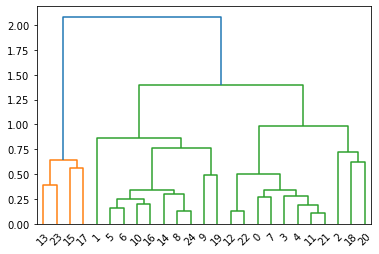

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [16]:
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [17]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [19]:
Clusters

,Clusters
0,0
1,2
2,0
3,0
4,0
5,2
6,2
7,0
8,2
9,2


In [20]:
final_data = pd.concat([Clusters,Univ] , axis = 1)
final_data

,Clusters,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90
5,2,Dartmouth,1340,89,23,10,32162,95
6,2,Duke,1315,90,30,12,31585,95
7,0,Georgetown,1255,74,24,12,20126,92
8,2,Harvard,1400,91,14,11,39525,97
9,2,JohnsHopkins,1305,75,44,7,58691,87


In [22]:
final_data.groupby('Clusters').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Clusters,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [23]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters']) 
final_data = pd.concat([Clusters,Univ] , axis = 1)
final_data.groupby('Clusters').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Clusters,,,,,,
0,1355.500000,89.000,26.900000,10.000,40897.200000,91.700000
1,1061.500000,38.750,70.000000,19.250,9953.000000,71.750000
2,1226.666667,74.000,55.666667,14.000,18545.333333,78.333333
3,1272.500000,80.625,33.000000,12.375,22535.000000,91.125000
